(1) Carga de datos - Datasets de entrenamiento y test a dataframe

In [1]:
import pandas as pd



csv_bikeshare_train_fe = "../datasets/train_set_fe.csv"
df_bikeshare_train_fe = pd.read_csv(csv_bikeshare_train_fe)

csv_bikeshare_test_fe = "../datasets/test_set_fe.csv"
df_bikeshare_test_fe = pd.read_csv(csv_bikeshare_test_fe)

C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\2145702711.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bikeshare_train_fe = pd.read_csv(csv_bikeshare_train_fe)
C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\2145702711.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bikeshare_test_fe = pd.read_csv(csv_bikeshare_test_fe)


(2) EDA - Analizar las propiedades básicas del dataset

In [2]:
df_bikeshare_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675518 entries, 0 to 675517
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   trip_id                   675518 non-null  int64  
 1   duration                  675518 non-null  int64  
 2   start_time                675518 non-null  object 
 3   end_time                  675518 non-null  object 
 4   start_lat                 675518 non-null  float64
 5   start_lon                 675518 non-null  float64
 6   end_lat                   675518 non-null  float64
 7   end_lon                   675518 non-null  float64
 8   bike_id                   675518 non-null  object 
 9   plan_duration             675518 non-null  int64  
 10  trip_route_category       675518 non-null  object 
 11  passholder_type           675518 non-null  object 
 12  start_station             675518 non-null  int64  
 13  end_station               675518 non-null  i

In [3]:
df_bikeshare_train_fe.describe()

,trip_id,duration,start_lat,start_lon,end_lat,end_lon,plan_duration,start_station,end_station,distance_km,start_hour,start_weekday,start_month,start_year,start_season,start_day_type,passholder_type_enum,trip_route_category_enum
count,6.755180e+05,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000,675518.000000
mean,1.063413e+08,31.095231,34.044959,-118.253702,34.043960,-118.260334,44.762678,3486.948408,3486.613104,2.646539,14.136970,3.011610,6.758252,2018.730989,2.482109,0.281378,0.905579,0.170956
std,4.513969e+07,92.745624,0.320054,2.295535,0.290425,2.061986,91.892671,611.529660,611.218947,118.534201,4.653278,1.979177,3.352178,1.404681,1.069149,0.449672,0.836204,0.376471
min,8.369648e+06,1.000000,33.710979,-118.495422,33.710979,-118.495422,0.000000,3000.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,1.000000,0.000000,0.000000,0.000000
25%,7.404934e+07,7.000000,34.038609,-118.280182,34.037460,-118.280510,1.000000,3030.000000,3031.000000,0.452735,11.000000,1.000000,4.000000,2018.000000,2.000000,0.000000,0.000000,0.000000
50%,1.167936e+08,13.000000,34.046612,-118.256668,34.046520,-118.256980,30.000000,3064.000000,3064.000000,0.941241,15.000000,3.000000,7.000000,2019.000000,2.000000,0.000000,1.000000,0.000000
75%,1.397134e+08,25.000000,34.051941,-118.246422,34.050911,-118.246422,30.000000,4211.000000,4212.000000,1.632361,18.000000,5.000000,10.000000,2020.000000,3.000000,1.000000,1.000000,0.000000
max,1.794576e+08,1440.000000,55.705528,118.238258,55.705528,37.606541,365.000000,4594.000000,4594.000000,10426.960898,23.000000,6.000000,12.000000,2021.000000,4.000000,1.000000,4.000000,1.000000


(2) EDA - Analizar el balanceo de clases

In [4]:
df_bikeshare_train_fe_ratio = df_bikeshare_train_fe["passholder_type"].value_counts()
print(df_bikeshare_train_fe_ratio)

passholder_type
Monthly Pass    387407
Walk-up         203850
One Day Pass     39875
Annual Pass      32966
Flex Pass        11420
Name: count, dtype: int64


In [5]:
df_bikeshare_train_fe_rationorm = df_bikeshare_train_fe["passholder_type"].value_counts(normalize=True)
print(df_bikeshare_train_fe_rationorm)

passholder_type
Monthly Pass    0.573496
Walk-up         0.301768
One Day Pass    0.059029
Annual Pass     0.048801
Flex Pass       0.016906
Name: proportion, dtype: float64


(2) EDA - Graficar la distribución de suscriptores

C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\3349980220.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


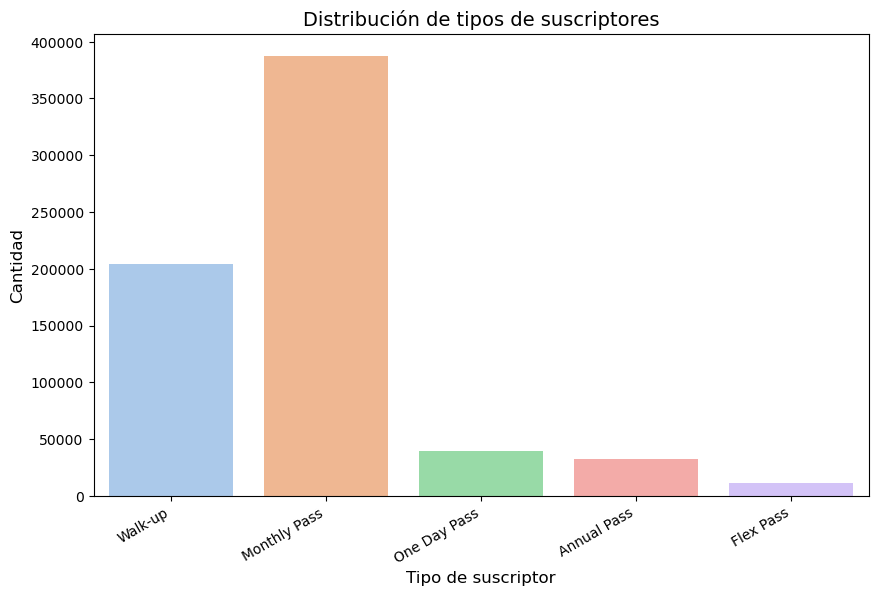

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 6))

sns.countplot(
    x="passholder_type",
    data=df_bikeshare_train_fe,
    palette="pastel"
)

# Etiquetas y títulos
plt.xlabel("Tipo de suscriptor", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.title("Distribución de tipos de suscriptores", fontsize=14)
plt.xticks(rotation=30, ha="right")

plt.show()

(2) EDA - Graficar  y verificar la distribución de la duración de los viajes

In [7]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["duration"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,14.391858,50.607884,1.0,5.0,8.0,14.0,1440.0
Flex Pass,11420.0,16.029159,55.092246,1.0,6.0,9.0,14.0,1440.0
Monthly Pass,387407.0,16.272261,49.413088,1.0,6.0,9.0,17.0,1440.0
One Day Pass,39875.0,73.194909,147.878053,1.0,15.0,29.0,75.0,1440.0
Walk-up,203850.0,54.575708,132.775007,1.0,13.0,25.0,51.0,1440.0


In [8]:
import scipy.stats as stats
import pandas as pd

# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["duration"], 'norm', args=(group["duration"].mean(), group["duration"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["duration"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.395651,0.0,8526.690434,0.787,5.0
Flex Pass,0.392504,0.0,3060.656957,0.787,5.0
Monthly Pass,0.378633,0.0,92514.705219,0.787,5.0
One Day Pass,0.312702,0.0,6431.291588,0.787,5.0
Walk-up,0.343287,0.0,41765.821255,0.787,5.0


C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\288135443.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,
C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\288135443.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,


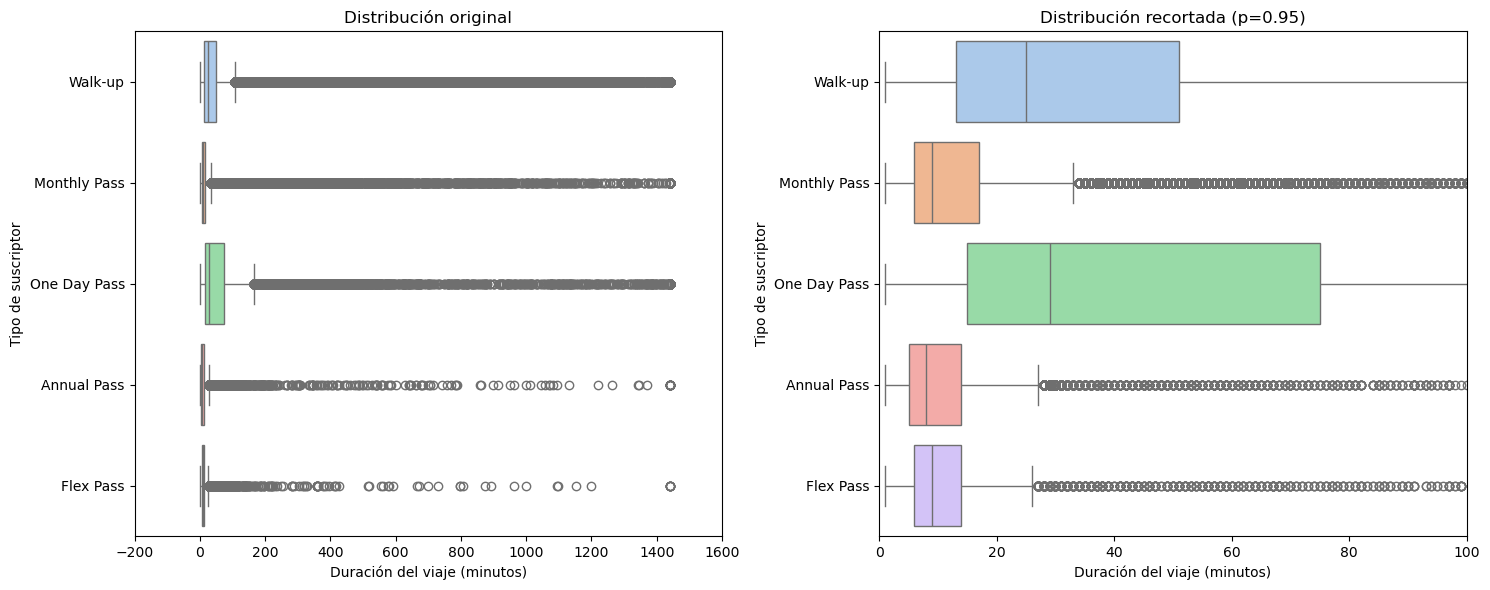

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



# Crear la figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer boxplot: Sin límites
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="duration",
            palette="pastel", 
            ax=axes[0])
axes[0].set_title("Distribución original")

# Segundo boxplot: Con límites en el percentil 95
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="duration",
            palette="pastel", 
            ax=axes[1])
axes[1].set_xlim(0, df_bikeshare_train_fe["duration"].quantile(0.95))
axes[1].set_title("Distribución recortada (p=0.95)")

# Etiquetas compartidas
for ax in axes:
    ax.set_xlabel("Duración del viaje (minutos)")
    ax.set_ylabel("Tipo de suscriptor")
    ax.set_xticks(ax.get_xticks())  # Asegurar que las etiquetas del eje X se mantengan

plt.tight_layout()  # Ajusta los espacios entre los gráficos
plt.show()

(2) EDA - Graficar la distribución de la distancia de los viajes

In [10]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["distance_km"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,8.815316,269.357314,0.0,0.644045,1.046077,1.897261,9786.055582
Flex Pass,11420.0,1.238350,0.787297,0.0,0.755883,1.127920,1.635860,20.844400
Monthly Pass,387407.0,1.337567,42.004015,0.0,0.554794,0.921508,1.510766,10426.960898
One Day Pass,39875.0,6.832382,229.769486,0.0,0.000000,0.958722,2.097863,9788.569359
Walk-up,203850.0,3.396680,145.375439,0.0,0.000000,0.956745,1.802424,9788.569359


In [11]:
import scipy.stats as stats
import pandas as pd

# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["distance_km"], 'norm', args=(group["distance_km"].mean(), group["distance_km"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["distance_km"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.499813,0.000000e+00,12610.074466,0.787,5.0
Flex Pass,0.090989,1.005160e-82,178.963022,0.787,5.0
Monthly Pass,0.487298,0.000000e+00,142651.122454,0.787,5.0
One Day Pass,0.488700,0.000000e+00,15160.884038,0.787,5.0
Walk-up,0.490680,0.000000e+00,77159.382535,0.787,5.0


C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\4280899196.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,
C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\4280899196.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,


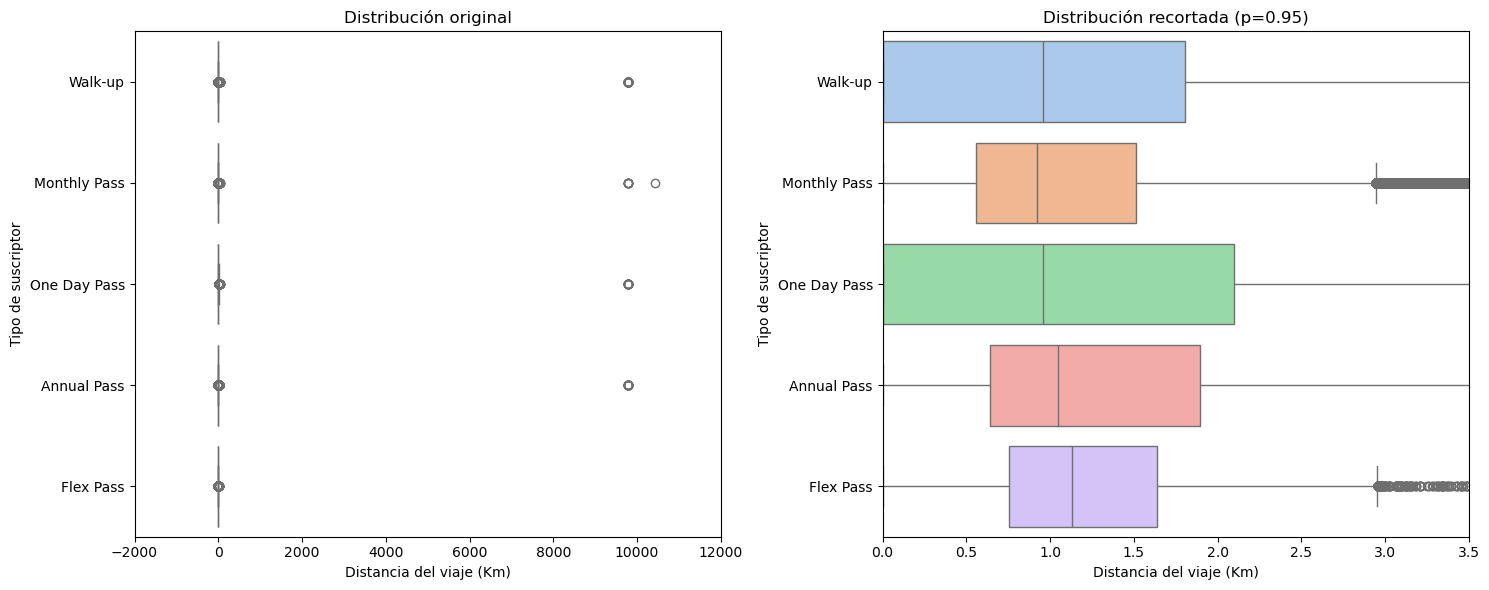

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns



# Crear la figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer boxplot: Sin límites
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="distance_km",
            palette="pastel", 
            ax=axes[0])
axes[0].set_title("Distribución original")

# Segundo boxplot: Con límites en el percentil 95
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="distance_km",
            palette="pastel", 
            ax=axes[1])
axes[1].set_xlim(0, df_bikeshare_train_fe["distance_km"].quantile(0.95))
axes[1].set_title("Distribución recortada (p=0.95)")

# Etiquetas compartidas
for ax in axes:
    ax.set_xlabel("Distancia del viaje (Km)")
    ax.set_ylabel("Tipo de suscriptor")
    ax.set_xticks(ax.get_xticks())  # Asegurar que las etiquetas del eje X se mantengan

plt.tight_layout()  # Ajusta los espacios entre los gráficos
plt.show()

(2) EDA - Graficar la distribución de la hora del día

In [13]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["start_hour"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,13.971607,4.842389,0.0,10.0,15.0,18.0,23.0
Flex Pass,11420.0,14.117075,4.603011,0.0,11.0,14.0,18.0,23.0
Monthly Pass,387407.0,13.982243,4.765667,0.0,10.0,14.0,18.0,23.0
One Day Pass,39875.0,14.112752,3.723762,0.0,12.0,14.0,17.0,23.0
Walk-up,203850.0,14.463615,4.554520,0.0,12.0,15.0,18.0,23.0


In [14]:
import scipy.stats as stats
import pandas as pd

# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["start_hour"], 'norm', args=(group["start_hour"].mean(), group["start_hour"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["start_hour"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.104168,6.518648e-312,296.308763,0.787,5.0
Flex Pass,0.101520,6.397991e-103,78.672296,0.787,5.0
Monthly Pass,0.099613,0.000000e+00,2849.500711,0.787,5.0
One Day Pass,0.058535,3.317847e-119,158.502026,0.787,5.0
Walk-up,0.070034,0.000000e+00,1208.756427,0.787,5.0


C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\3266765780.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,
C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\3266765780.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,


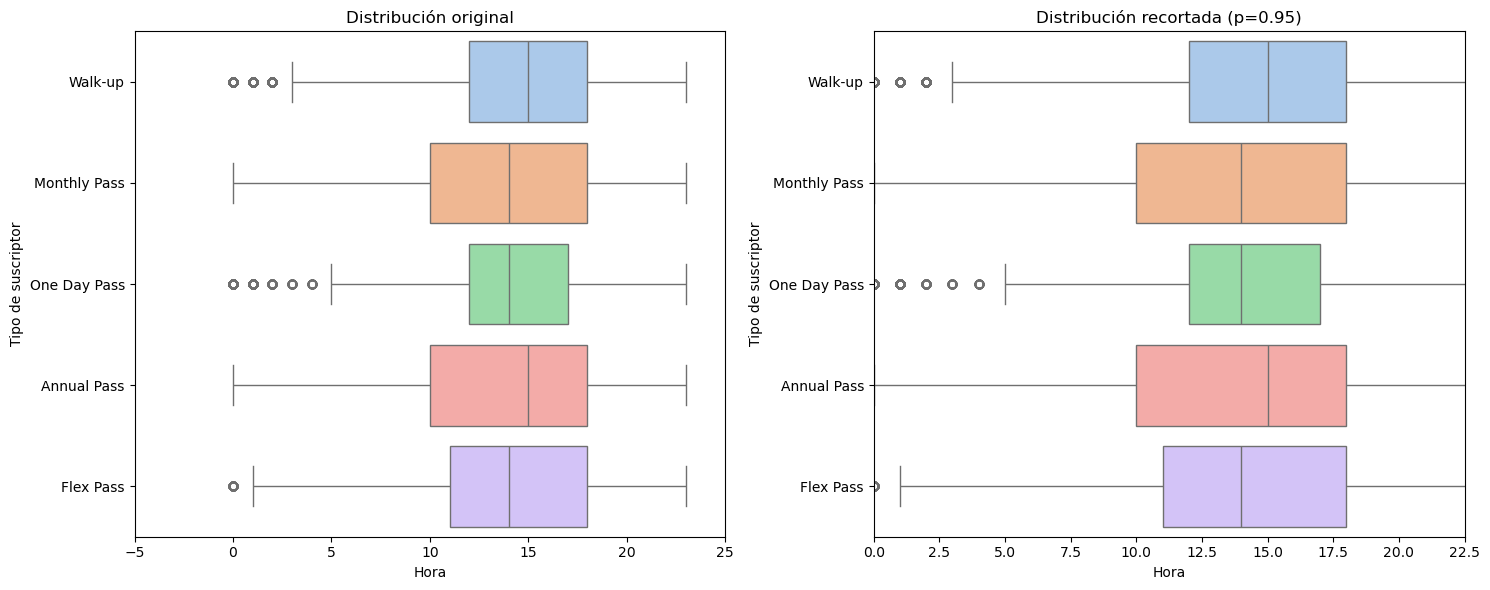

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns



# Crear la figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer boxplot: Sin límites
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_hour",
            palette="pastel", 
            ax=axes[0])
axes[0].set_title("Distribución original")

# Segundo boxplot: Con límites en el percentil 95
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_hour",
            palette="pastel", 
            ax=axes[1])
axes[1].set_xlim(0, df_bikeshare_train_fe["start_hour"].quantile(0.95))
axes[1].set_title("Distribución recortada (p=0.95)")

# Etiquetas compartidas
for ax in axes:
    ax.set_xlabel("Hora")
    ax.set_ylabel("Tipo de suscriptor")
    ax.set_xticks(ax.get_xticks())  # Asegurar que las etiquetas del eje X se mantengan

plt.tight_layout()  # Ajusta los espacios entre los gráficos
plt.show()

(2) EDA - Graficar la distribución del día de la semana

In [16]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["start_weekday"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,2.766820,1.902145,0.0,1.0,3.0,4.0,6.0
Flex Pass,11420.0,2.966725,1.921330,0.0,1.0,3.0,5.0,6.0
Monthly Pass,387407.0,2.745973,1.896692,0.0,1.0,3.0,4.0,6.0
One Day Pass,39875.0,3.652188,2.038903,0.0,2.0,4.0,5.0,6.0
Walk-up,203850.0,3.433240,2.033936,0.0,2.0,4.0,5.0,6.0


In [17]:
import scipy.stats as stats
import pandas as pd

# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["start_weekday"], 'norm', args=(group["start_weekday"].mean(), group["start_weekday"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["start_weekday"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.135112,0.000000e+00,693.541206,0.787,5.0
Flex Pass,0.121365,4.808215e-147,236.482875,0.787,5.0
Monthly Pass,0.133702,0.000000e+00,8041.985556,0.787,5.0
One Day Pass,0.197947,0.000000e+00,1553.320014,0.787,5.0
Walk-up,0.174149,0.000000e+00,6498.637473,0.787,5.0


C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\3958466865.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,
C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\3958466865.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,


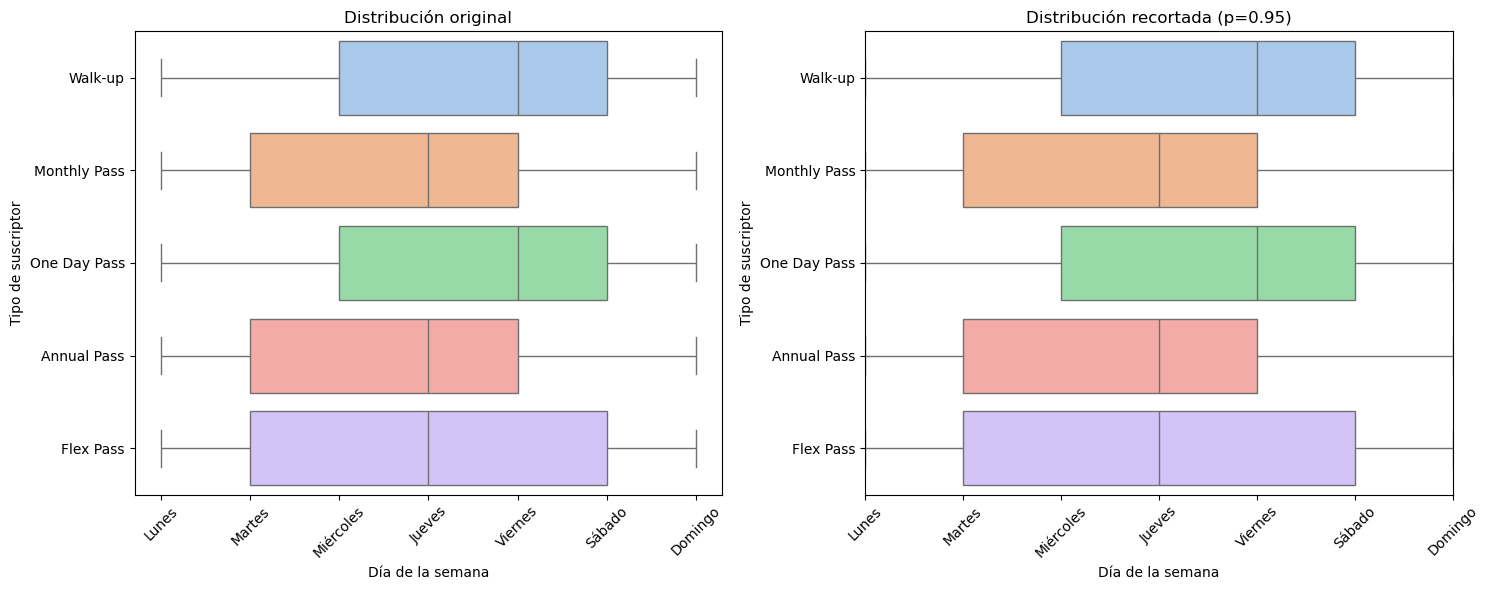

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns



# Definir etiquetas personalizadas para los días de la semana
dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crear la figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer boxplot: Sin límites
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_weekday",
            palette="pastel", 
            ax=axes[0])
axes[0].set_title("Distribución original")

# Segundo boxplot: Con límites en el percentil 95
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_weekday",
            palette="pastel", 
            ax=axes[1])
axes[1].set_xlim(0, df_bikeshare_train_fe["start_weekday"].quantile(0.95))
axes[1].set_title("Distribución recortada (p=0.95)")

# Cambiar etiquetas del eje X en ambos gráficos
for ax in axes:
    ax.set_xlabel("Día de la semana")
    ax.set_ylabel("Tipo de suscriptor")
    ax.set_xticks(range(7))  # Asegurar que las posiciones de los ticks sean correctas
    ax.set_xticklabels(dias_semana, rotation=45)  # Aplicar etiquetas y rotarlas para mejor visibilidad

plt.tight_layout()  # Ajusta los espacios entre los gráficos
plt.show()


(2) EDA - Graficar la distribución del mes

In [19]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["start_month"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,6.586574,3.636812,1.0,3.0,7.0,10.0,12.0
Flex Pass,11420.0,6.710946,3.387733,1.0,4.0,7.0,10.0,12.0
Monthly Pass,387407.0,6.715165,3.367965,1.0,4.0,7.0,10.0,12.0
One Day Pass,39875.0,6.709091,3.363864,1.0,4.0,7.0,10.0,12.0
Walk-up,203850.0,6.880167,3.265193,1.0,4.0,7.0,10.0,12.0


In [20]:
import scipy.stats as stats
import pandas as pd

# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["start_month"], 'norm', args=(group["start_month"].mean(), group["start_month"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["start_month"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.119510,0.000000e+00,671.891029,0.787,5.0
Flex Pass,0.126663,3.581614e-160,187.095671,0.787,5.0
Monthly Pass,0.106285,0.000000e+00,5684.445558,0.787,5.0
One Day Pass,0.118297,0.000000e+00,570.237067,0.787,5.0
Walk-up,0.098403,0.000000e+00,2553.603791,0.787,5.0


C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\574578745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,
C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\574578745.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,


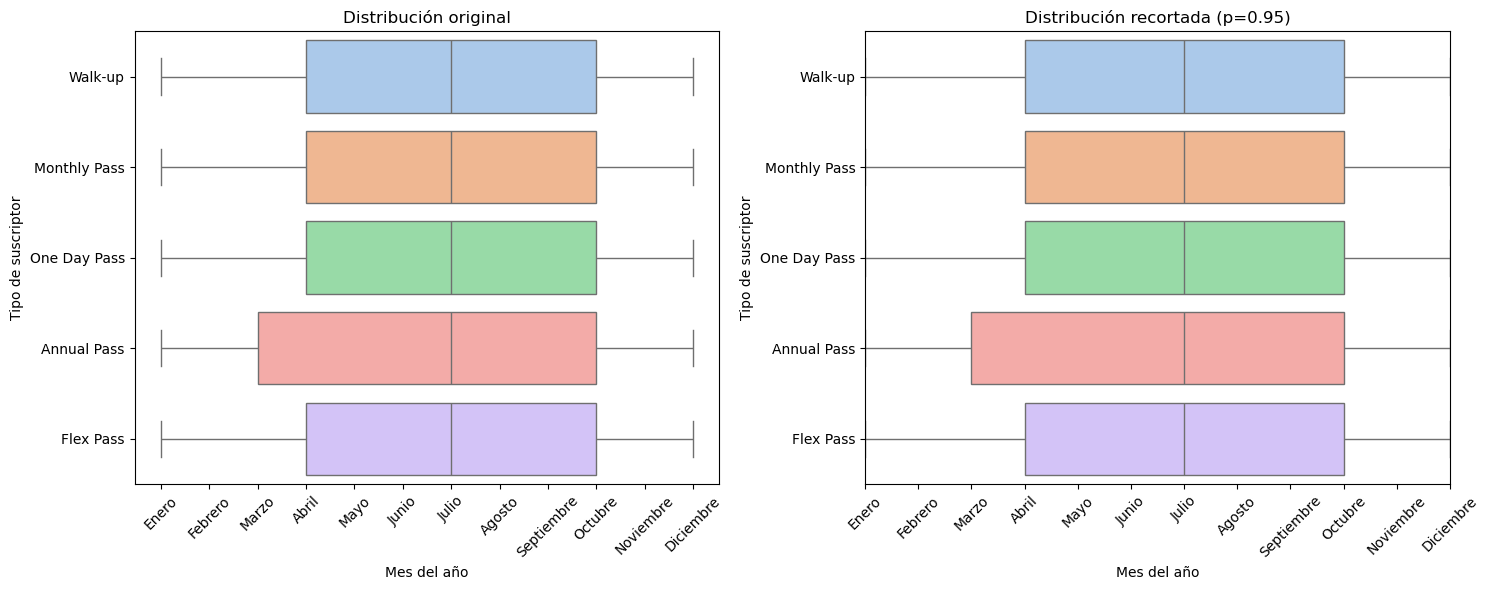

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns



# Definir etiquetas personalizadas para los meses del año
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Crear la figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer boxplot: Sin límites
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_month",
            palette="pastel", 
            ax=axes[0])
axes[0].set_title("Distribución original")

# Segundo boxplot: Con límites en el percentil 95
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_month",
            palette="pastel", 
            ax=axes[1])
axes[1].set_xlim(1, df_bikeshare_train_fe["start_month"].quantile(0.95))  
axes[1].set_title("Distribución recortada (p=0.95)")

# Cambiar etiquetas del eje X en ambos gráficos
for ax in axes:
    ax.set_xlabel("Mes del año")
    ax.set_ylabel("Tipo de suscriptor")
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])  # Asegurar que los ticks coincidan con los valores 1-12
    ax.set_xticklabels(meses, rotation=45)  # Aplicar etiquetas y rotarlas para mejor visibilidad

plt.tight_layout()  # Ajusta los espacios entre los gráficos
plt.show()

(2) EDA - Graficar la distribución de la estación del año

In [22]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["start_season"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,2.648608,1.112365,1.0,2.0,3.0,4.0,4.0
Flex Pass,11420.0,2.441944,1.087490,1.0,1.0,2.0,3.0,4.0
Monthly Pass,387407.0,2.491266,1.073506,1.0,2.0,3.0,3.0,4.0
One Day Pass,39875.0,2.429843,1.090393,1.0,1.0,2.0,3.0,4.0
Walk-up,203850.0,2.450253,1.045295,1.0,2.0,2.0,3.0,4.0


In [23]:
import scipy.stats as stats
import pandas as pd

# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["start_season"], 'norm', args=(group["start_season"].mean(), group["start_season"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["start_season"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.191592,0.0,1730.478433,0.787,5.0
Flex Pass,0.188987,0.0,554.391952,0.787,5.0
Monthly Pass,0.183333,0.0,18118.828422,0.787,5.0
One Day Pass,0.189638,0.0,1929.649241,0.787,5.0
Walk-up,0.191901,0.0,9328.341289,0.787,5.0


C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\671729430.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,
C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\671729430.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,


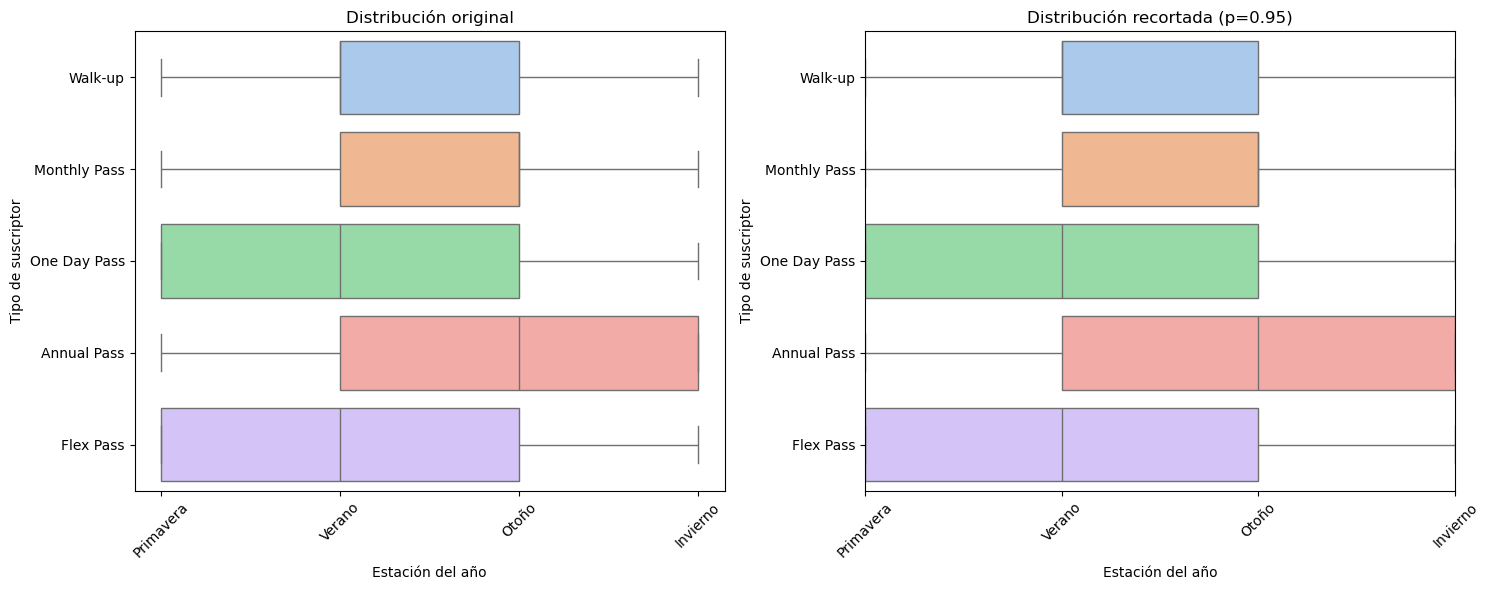

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns



# Definir etiquetas personalizadas para las estaciones del año
estaciones = ["Primavera", "Verano", "Otoño", "Invierno"]

# Crear la figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer boxplot: Sin límites
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_season",
            palette="pastel", 
            ax=axes[0])
axes[0].set_title("Distribución original")

# Segundo boxplot: Con límites en el percentil 95
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_season",
            palette="pastel", 
            ax=axes[1])
axes[1].set_xlim(1, df_bikeshare_train_fe["start_season"].quantile(0.95))  
axes[1].set_title("Distribución recortada (p=0.95)")

# Cambiar etiquetas del eje X en ambos gráficos
for ax in axes:
    ax.set_xlabel("Estación del año")
    ax.set_ylabel("Tipo de suscriptor")
    ax.set_xticks([1, 2, 3, 4])  # Asegurar que los ticks coincidan con los valores 1-4
    ax.set_xticklabels(estaciones, rotation=45)  # Aplicar etiquetas y rotarlas para mejor visibilidad

plt.tight_layout()  # Ajusta los espacios entre los gráficos
plt.show()

(2) EDA - Graficar la distribución de los años

In [25]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["start_year"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,2019.867379,0.873080,2018.0,2019.0,2020.0,2021.0,2021.0
Flex Pass,11420.0,2017.214799,0.680512,2016.0,2017.0,2017.0,2018.0,2019.0
Monthly Pass,387407.0,2018.658261,1.382577,2016.0,2018.0,2019.0,2020.0,2021.0
One Day Pass,39875.0,2019.459335,1.331919,2017.0,2018.0,2020.0,2021.0,2021.0
Walk-up,203850.0,2018.627898,1.395539,2016.0,2018.0,2018.0,2020.0,2021.0


In [26]:
import scipy.stats as stats
import pandas as pd

# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["start_year"], 'norm', args=(group["start_year"].mean(), group["start_year"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["start_year"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.224398,0.0,2171.418181,0.787,5.0
Flex Pass,0.290063,0.0,1023.559526,0.787,5.0
Monthly Pass,0.151724,0.0,10081.335293,0.787,5.0
One Day Pass,0.188587,0.0,1929.558609,0.787,5.0
Walk-up,0.214572,0.0,7407.461118,0.787,5.0


C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\1640993785.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,
C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\1640993785.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bikeshare_train_fe,


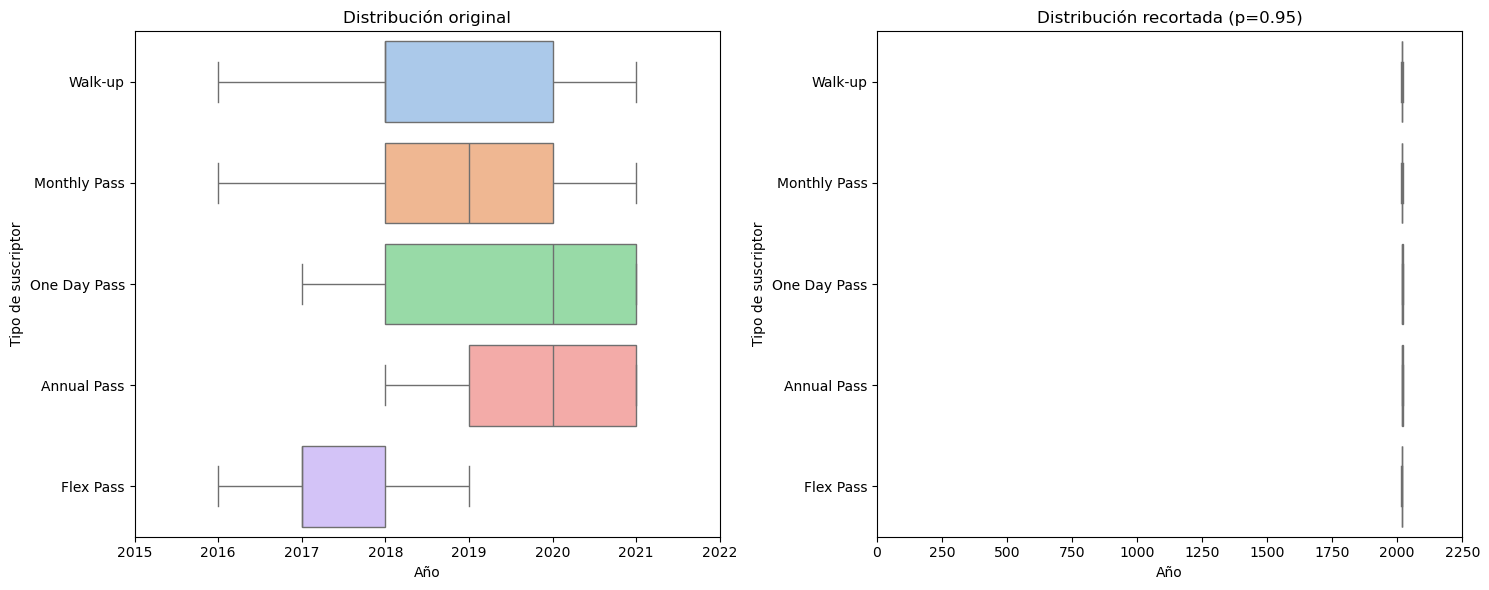

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns



# Crear la figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer boxplot: Sin límites
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_year",
            palette="pastel", 
            ax=axes[0])
axes[0].set_title("Distribución original")

# Segundo boxplot: Con límites en el percentil 95
sns.boxplot(data=df_bikeshare_train_fe, 
            y="passholder_type",
            x="start_year",
            palette="pastel", 
            ax=axes[1])
axes[1].set_xlim(0, df_bikeshare_train_fe["start_year"].quantile(0.95))
axes[1].set_title("Distribución recortada (p=0.95)")

# Etiquetas compartidas
for ax in axes:
    ax.set_xlabel("Año")
    ax.set_ylabel("Tipo de suscriptor")
    ax.set_xticks(ax.get_xticks())  # Asegurar que las etiquetas del eje X se mantengan

plt.tight_layout()  # Ajusta los espacios entre los gráficos
plt.show()

(2) EDA - Obtener la distribución del tipo de ruta (directo=0, redondo=1)

In [28]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["trip_route_category_enum"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,0.076897,0.266433,0.0,0.0,0.0,0.0,1.0
Flex Pass,11420.0,0.048687,0.215221,0.0,0.0,0.0,0.0,1.0
Monthly Pass,387407.0,0.090169,0.286424,0.0,0.0,0.0,0.0,1.0
One Day Pass,39875.0,0.299862,0.458203,0.0,0.0,0.0,1.0,1.0
Walk-up,203850.0,0.321334,0.466990,0.0,0.0,0.0,1.0,1.0


In [29]:
import scipy.stats as stats
import pandas as pd

# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["trip_route_category_enum"], 'norm', args=(group["trip_route_category_enum"].mean(), group["trip_route_category_enum"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["trip_route_category_enum"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.536666,0.0,11356.660220,0.787,5.0
Flex Pass,0.540797,0.0,4133.771987,0.787,5.0
Monthly Pass,0.533378,0.0,130127.943022,0.787,5.0
One Day Pass,0.443721,0.0,8704.691998,0.787,5.0
Walk-up,0.432970,0.0,42896.536779,0.787,5.0


(2) EDA - Obtener la distribución del tipo de día (laboral=0, fin de semana=1)

In [30]:
desc_stats = df_bikeshare_train_fe.groupby("passholder_type")["start_day_type"].describe()

desc_stats

,count,mean,std,min,25%,50%,75%,max
passholder_type,,,,,,,,
Annual Pass,32966.0,0.213523,0.409800,0.0,0.0,0.0,0.0,1.0
Flex Pass,11420.0,0.259720,0.438500,0.0,0.0,0.0,1.0,1.0
Monthly Pass,387407.0,0.210572,0.407715,0.0,0.0,0.0,0.0,1.0
One Day Pass,39875.0,0.452238,0.497720,0.0,0.0,0.0,1.0,1.0
Walk-up,203850.0,0.394707,0.488789,0.0,0.0,0.0,1.0,1.0


In [31]:
import scipy.stats as stats
import pandas as pd



# Crear un diccionario para almacenar los resultados
normality_results = {}

# Iterar sobre cada tipo de passholder_type
for passholder, group in df_bikeshare_train_fe.groupby("passholder_type"):
    ks_stat, ks_p = stats.kstest(group["start_day_type"], 'norm', args=(group["start_day_type"].mean(), group["start_day_type"].std()))
    ad_stat, ad_crit, ad_signif = stats.anderson(group["start_day_type"], dist='norm')
    
    normality_results[passholder] = {
        "KS-Statistic": ks_stat, 
        "KS p-value": ks_p, 
        "AD Statistic": ad_stat, 
        "AD Critical Value (5%)": ad_crit[2], 
        "AD Significance Level (5%)": ad_signif[2]
    }

# Convertir los resultados en un dataframe
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

normality_df

,KS-Statistic,KS p-value,AD Statistic,AD Critical Value (5%),AD Significance Level (5%)
Annual Pass,0.485308,0.0,8532.087410,0.787,5.0
Flex Pass,0.463452,0.0,2688.174101,0.787,5.0
Monthly Pass,0.486664,0.0,100897.612579,0.787,5.0
One Day Pass,0.365986,0.0,7250.447783,0.787,5.0
Walk-up,0.395610,0.0,38794.380989,0.787,5.0


In [32]:
# Columnas a excluir (en general) en los modelos
columnas_excluir = ["trip_id", "start_time", "end_time", "bike_id", "plan_duration",
                    "trip_route_category","passholder_type", "passholder_type_enum",
                    "start_lat", "start_lon", "end_lat", "end_lon"]

(2) EDA - Procesar outliers por método "Winsorization" y normalizar (dataset de entrenamiento)

In [51]:
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler



# Aplicar Winsorization solo a las columnas numéricas relevantes
columnas_winsorizar = [col for col in df_bikeshare_train_fe.select_dtypes(include=[np.number]).columns if col not in columnas_excluir]

for col in columnas_winsorizar:
    df_bikeshare_train_fe[col] = winsorize(df_bikeshare_train_fe[col], limits=[0.01, 0.01])  # 1% en cada extremo

In [52]:
# Normalizar los valores con MinMaxScaler
scaler = MinMaxScaler()
df_bikeshare_train_fe[columnas_winsorizar] = scaler.fit_transform(df_bikeshare_train_fe[columnas_winsorizar])

(2) EDA - Procesar outliers por método "Winsorization" y normalizar (dataset de testeo)

In [53]:
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler



# Aplicar Winsorization solo a las columnas numéricas relevantes
columnas_winsorizar = [col for col in df_bikeshare_test_fe.select_dtypes(include=[np.number]).columns if col not in columnas_excluir]

for col in columnas_winsorizar:
    df_bikeshare_test_fe[col] = winsorize(df_bikeshare_test_fe[col], limits=[0.01, 0.01])  # 1% en cada extremo

In [54]:
# Normalizar los valores con MinMaxScaler
scaler = MinMaxScaler()
df_bikeshare_test_fe[columnas_winsorizar] = scaler.fit_transform(df_bikeshare_test_fe[columnas_winsorizar])

(2) EDA - Obtener la matriz de correlación

In [55]:
import pandas as pd



# Eliminar las columnas del dataframe
df_bikeshare_train_fe_corr = df_bikeshare_train_fe.drop(columns=columnas_excluir)

df_bikeshare_train_fe_corr.head()

,duration,start_station,end_station,distance_km,start_hour,start_weekday,start_month,start_year,start_season,start_day_type,trip_route_category_enum
0,0.104938,0.719231,0.719692,0.000000,0.478261,0.166667,0.636364,0.4,0.333333,0.0,1.0
1,0.095679,0.033333,0.036562,0.550655,0.739130,1.000000,0.727273,0.2,0.666667,1.0,0.0
2,0.015432,0.010897,0.036562,0.181178,0.391304,0.000000,0.272727,0.6,0.000000,0.0,0.0
3,0.422840,0.832692,0.837716,0.101317,0.478261,1.000000,0.727273,0.6,0.666667,1.0,0.0
4,0.040123,0.808333,0.922386,0.100062,0.739130,0.666667,0.000000,0.8,1.000000,0.0,0.0


In [56]:
df_bikeshare_train_fe_corr.select_dtypes(include=['number']).corr(method='spearman')

,duration,start_station,end_station,distance_km,start_hour,start_weekday,start_month,start_year,start_season,start_day_type,trip_route_category_enum
duration,1.000000,0.280038,0.284823,0.133329,0.057669,0.154676,0.005621,0.122017,-0.031647,0.182260,0.288543
start_station,0.280038,1.000000,0.591092,0.039829,0.017833,0.094060,-0.011112,0.307024,-0.036025,0.114627,0.204158
end_station,0.284823,0.591092,1.000000,0.036929,0.053228,0.094261,-0.009997,0.310333,-0.037426,0.115427,0.204496
distance_km,0.133329,0.039829,0.036929,1.000000,-0.022944,-0.027033,0.005625,0.014485,0.013113,-0.031150,-0.653298
start_hour,0.057669,0.017833,0.053228,-0.022944,1.000000,0.013674,-0.007579,0.018413,-0.032909,0.014409,0.021647
start_weekday,0.154676,0.094060,0.094261,-0.027033,0.013674,1.000000,0.000953,0.029032,0.001173,0.786951,0.079179
start_month,0.005621,-0.011112,-0.009997,0.005625,-0.007579,0.000953,1.000000,-0.203034,0.272845,0.005507,-0.002087
start_year,0.122017,0.307024,0.310333,0.014485,0.018413,0.029032,-0.203034,1.000000,-0.064204,0.031033,0.082370
start_season,-0.031647,-0.036025,-0.037426,0.013113,-0.032909,0.001173,0.272845,-0.064204,1.000000,-0.002279,-0.033992
start_day_type,0.182260,0.114627,0.115427,-0.031150,0.014409,0.786951,0.005507,0.031033,-0.002279,1.000000,0.096280


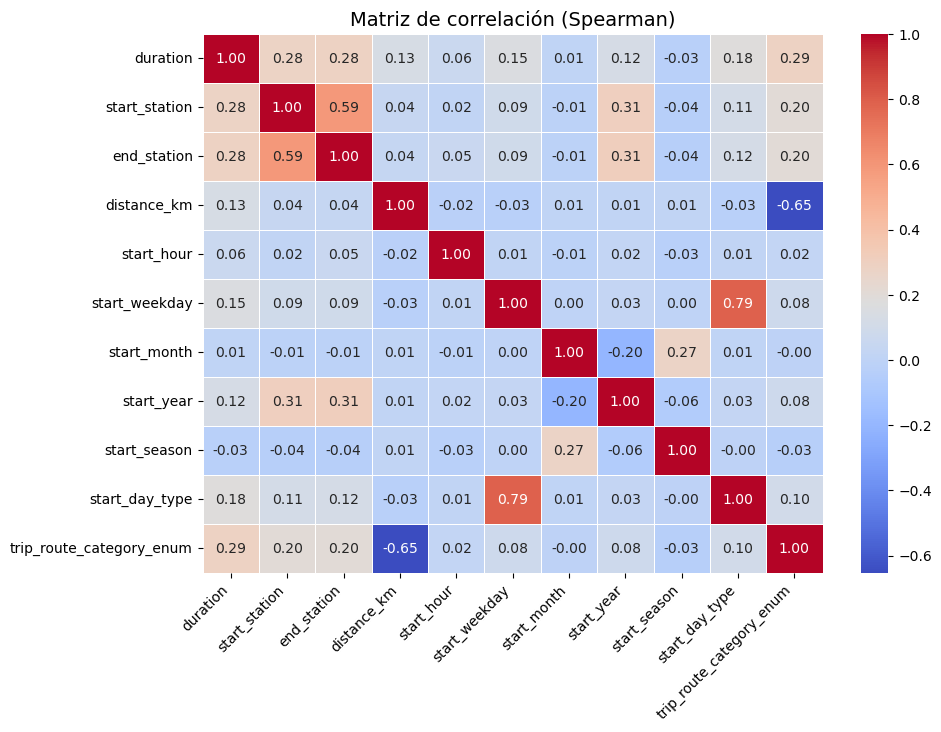

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt



# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 7))

# Crear el heatmap con mejor tamaño de fuente
sns.heatmap(
    df_bikeshare_train_fe_corr.select_dtypes(include=['number']).corr(method='spearman'), 
    annot=True, 
    fmt=".2f",  # Formato de los números
    cmap="coolwarm",  # Cambiar el color para mejor visualización
    linewidths=0.5,  # Separación entre celdas
    annot_kws={"size": 10}  # Tamaño del texto dentro de las celdas
)

# Ajustar el título y mostrar la gráfica
plt.title("Matriz de correlación (Spearman)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar etiquetas del eje X
plt.yticks(fontsize=10)  # Ajustar tamaño del eje Y
plt.show()

(3) Modelo de clasificación - Balancear clases

In [74]:
import pandas as pd



# Obtener el tamaño de la clase minoritaria
min_class_size = df_bikeshare_train_fe["passholder_type"].value_counts().min()

# Realizar el submuestreo equitativo
df_bikeshare_train_fe_balanced = df_bikeshare_train_fe.groupby("passholder_type").apply(lambda x: x.sample(min_class_size, random_state=42)).reset_index(drop=True)

# Comentar si deseo balancear las clases
# df_bikeshare_train_fe_balanced = df_bikeshare_train_fe.copy()

# Mostrar la nueva distribución de clases
print(df_bikeshare_train_fe_balanced["passholder_type"].value_counts())

passholder_type
Annual Pass     11420
Flex Pass       11420
Monthly Pass    11420
One Day Pass    11420
Walk-up         11420
Name: count, dtype: int64


C:\Users\gerar\AppData\Local\Temp\ipykernel_4480\696531490.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bikeshare_train_fe_balanced = df_bikeshare_train_fe.groupby("passholder_type").apply(lambda x: x.sample(min_class_size, random_state=42)).reset_index(drop=True)


(3) Modelo de clasificación - Random Forest

In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load

# Cargar el dataset
df = df_bikeshare_train_fe_balanced.copy()

# Selección de características y etiquetas
X = df.drop(columns=columnas_excluir, errors='ignore')
y = df["passholder_type"].astype("category").cat.codes  # Convertir etiquetas a numérico
category_mapping = dict(enumerate(df_bikeshare_train_fe_balanced["passholder_type"].astype("category").cat.categories))

# Escribir el encoding de clases
print("**********************************************")
print("[Random Forest]")
print("Encoding ->")
print(category_mapping)
print("**********************************************")

# Parámetro ajustable: Número de folds
num_folds = 5

# Aplicar K-Fold Cross Validation y guardar cada modelo por fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Configurar el clasificador Random Forest
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)
    
    # Evaluar el modelo en el fold actual
    y_pred = rf_clf.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print("------------------------------------------")
    print(f"<<< Random Forest (fold {fold+1}) >>>")
    print("Precisión -> ", fold_accuracy)
    print("Matriz de confusión ->")
    print(conf_matrix)
    print("Reporte de clasificación ->")
    print(class_report)
    
    # Guardar el modelo de este fold
    model_filename = f"../trained_models/random_forest_fold_{fold+1}.joblib"
    dump(rf_clf, model_filename)
    print(f"Modelo del fold {fold+1} guardado en {model_filename}")

**********************************************
[Random Forest]
Encoding ->
{0: 'Annual Pass', 1: 'Flex Pass', 2: 'Monthly Pass', 3: 'One Day Pass', 4: 'Walk-up'}
**********************************************
------------------------------------------
<<< Random Forest (fold 1) >>>
Precisión ->  0.5950087565674256
Matriz de confusión ->
[[1861    3  212  158   64]
 [  12 1858  144   45  178]
 [ 527  554  718  228  194]
 [ 262   82  168 1403  378]
 [ 288  342  207  579  955]]
Reporte de clasificación ->
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      2298
           1       0.65      0.83      0.73      2237
           2       0.50      0.32      0.39      2221
           3       0.58      0.61      0.60      2293
           4       0.54      0.40      0.46      2371

    accuracy                           0.60     11420
   macro avg       0.58      0.60      0.58     11420
weighted avg       0.58      0.60      0.58     11420

Mod

(3) Modelo de clasificación - XGBoost

In [84]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump

# Cargar el dataset
df = df_bikeshare_train_fe_balanced.copy()

# Selección de características y etiquetas
X = df.drop(columns=columnas_excluir, errors='ignore')
y = df["passholder_type"].astype("category").cat.codes  # Convertir etiquetas a numérico
category_mapping = dict(enumerate(df_bikeshare_train_fe_balanced["passholder_type"].astype("category").cat.categories))

# Escribir el encoding de clases
print("**********************************************")
print("[XGBoost]")
print("Encoding ->")
print(category_mapping)
print("**********************************************")

# Parámetro ajustable: Número de folds
num_folds = 5

# Aplicar K-Fold Cross Validation y guardar cada modelo por fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Configurar el clasificador XGBoost
    xgb_clf = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric="mlogloss"
    )
    
    # Entrenar el modelo
    xgb_clf.fit(X_train, y_train)
    
    # Evaluar el modelo en el fold actual
    y_pred = xgb_clf.predict(X_test)
    fold_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print("------------------------------------------")
    print(f"<<< XGBoost (fold {fold+1}) >>>")
    print("Precisión -> ", fold_accuracy)
    print("Matriz de confusión ->")
    print(conf_matrix)
    print("Reporte de clasificación ->")
    print(class_report)
    
    # Guardar el modelo de este fold
    model_filename = f"../trained_models/xgboost_fold_{fold+1}.joblib"
    dump(xgb_clf, model_filename)
    print(f"Modelo del fold {fold+1} guardado en {model_filename}")

**********************************************
[XGBoost]
Encoding ->
{0: 'Annual Pass', 1: 'Flex Pass', 2: 'Monthly Pass', 3: 'One Day Pass', 4: 'Walk-up'}
**********************************************


c:\Users\gerar\miniconda3\envs\nb\lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:52] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


------------------------------------------
<<< XGBoost (fold 1) >>>
Precisión ->  0.5845008756567426
Matriz de confusión ->
[[1915    2  152  174   55]
 [  27 1903   95   42  170]
 [ 655  663  516  227  160]
 [ 272   93  146 1418  364]
 [ 300  383  186  579  923]]
Reporte de clasificación ->
              precision    recall  f1-score   support

           0       0.60      0.83      0.70      2298
           1       0.63      0.85      0.72      2237
           2       0.47      0.23      0.31      2221
           3       0.58      0.62      0.60      2293
           4       0.55      0.39      0.46      2371

    accuracy                           0.58     11420
   macro avg       0.57      0.58      0.56     11420
weighted avg       0.57      0.58      0.56     11420

Modelo del fold 1 guardado en ../trained_models/xgboost_fold_1.joblib


c:\Users\gerar\miniconda3\envs\nb\lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:53] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


------------------------------------------
<<< XGBoost (fold 2) >>>
Precisión ->  0.5841506129597198
Matriz de confusión ->
[[1940    3  126  209   45]
 [  16 1970  121   58  167]
 [ 627  695  534  281  152]
 [ 258  114  160 1372  325]
 [ 298  338  162  594  855]]
Reporte de clasificación ->
              precision    recall  f1-score   support

           0       0.62      0.84      0.71      2323
           1       0.63      0.84      0.72      2332
           2       0.48      0.23      0.31      2289
           3       0.55      0.62      0.58      2229
           4       0.55      0.38      0.45      2247

    accuracy                           0.58     11420
   macro avg       0.57      0.58      0.56     11420
weighted avg       0.57      0.58      0.56     11420

Modelo del fold 2 guardado en ../trained_models/xgboost_fold_2.joblib


c:\Users\gerar\miniconda3\envs\nb\lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:55] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


------------------------------------------
<<< XGBoost (fold 3) >>>
Precisión ->  0.5785464098073555
Matriz de confusión ->
[[1813    4  137  204   52]
 [  30 1861  135   47  160]
 [ 701  659  563  275  163]
 [ 263  125  145 1465  387]
 [ 299  327  129  571  905]]
Reporte de clasificación ->
              precision    recall  f1-score   support

           0       0.58      0.82      0.68      2210
           1       0.63      0.83      0.71      2233
           2       0.51      0.24      0.32      2361
           3       0.57      0.61      0.59      2385
           4       0.54      0.41      0.46      2231

    accuracy                           0.58     11420
   macro avg       0.57      0.58      0.56     11420
weighted avg       0.57      0.58      0.55     11420

Modelo del fold 3 guardado en ../trained_models/xgboost_fold_3.joblib


c:\Users\gerar\miniconda3\envs\nb\lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:57] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


------------------------------------------
<<< XGBoost (fold 4) >>>
Precisión ->  0.5943957968476358
Matriz de confusión ->
[[1920    7  106  171   59]
 [  33 1966  100   55  161]
 [ 666  645  560  249  151]
 [ 259  125  127 1391  356]
 [ 298  349  139  576  951]]
Reporte de clasificación ->
              precision    recall  f1-score   support

           0       0.60      0.85      0.71      2263
           1       0.64      0.85      0.73      2315
           2       0.54      0.25      0.34      2271
           3       0.57      0.62      0.59      2258
           4       0.57      0.41      0.48      2313

    accuracy                           0.59     11420
   macro avg       0.58      0.59      0.57     11420
weighted avg       0.58      0.59      0.57     11420

Modelo del fold 4 guardado en ../trained_models/xgboost_fold_4.joblib


c:\Users\gerar\miniconda3\envs\nb\lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:59] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


------------------------------------------
<<< XGBoost (fold 5) >>>
Precisión ->  0.5821366024518388
Matriz de confusión ->
[[1922    6  140  197   61]
 [  25 1949  112   59  158]
 [ 660  701  530  236  151]
 [ 290   98  139 1391  337]
 [ 281  366  134  621  856]]
Reporte de clasificación ->
              precision    recall  f1-score   support

           0       0.60      0.83      0.70      2326
           1       0.62      0.85      0.72      2303
           2       0.50      0.23      0.32      2278
           3       0.56      0.62      0.58      2255
           4       0.55      0.38      0.45      2258

    accuracy                           0.58     11420
   macro avg       0.57      0.58      0.55     11420
weighted avg       0.57      0.58      0.55     11420

Modelo del fold 5 guardado en ../trained_models/xgboost_fold_5.joblib


(4) Kaggle submission - Carga del modelo a utilizar

In [85]:
# Cargar el dataset de test
df = df_bikeshare_test_fe.copy()

# Selección de características y etiquetas
X = df.drop(columns=columnas_excluir, errors='ignore')

# Para cargar un modelo guardado y reutilizarlo posteriormente
loaded_model = load("../trained_models/xgboost_fold_5.joblib")
y_pred_loaded = loaded_model.predict(X)

(4) Kaggle submission - Construir dataset con las predicciones

In [86]:
category_mapping = dict(enumerate(df_bikeshare_train_fe_balanced["passholder_type"].astype("category").cat.categories))
y_pred_labels = [category_mapping[pred] for pred in y_pred_loaded]

df_predictions = pd.DataFrame({
    "trip_id": df_bikeshare_test_fe["trip_id"],
    "passholder_type": y_pred_labels
})

# El formato solicita registros del 0-569886
df_predictions.tail()

,trip_id,passholder_type
569881,179408277,Annual Pass
569882,179408276,Annual Pass
569883,179409877,Annual Pass
569884,179409876,Annual Pass
569885,179492474,One Day Pass


(4) Kaggle submission - Guardar el dataset en el formato compatible

In [87]:
df_predictions.to_csv("../datasets/submission16.csv", index=False)